# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.inspection import permutation_importance
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
creditcard = pd.read_csv('/content/creditcard.csv')

In [ ]:
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
creditcard.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df_fraud = pd.read_csv('/content/fraud_data_merged.csv')

In [ ]:
df_fraud

,signup_time,purchase_time,purchase_value,age,class,purchase_hour,lower_bound_ip_address,upper_bound_ip_address,country,hour_of_day,...,country_grouped_Tunisia,country_grouped_Turkey,country_grouped_Ukraine,country_grouped_United Arab Emirates,country_grouped_United Kingdom,country_grouped_United States,country_grouped_Venezuela,country_grouped_Viet Nam,country_grouped_other,country_grouped_None
0,2015-01-11 03:47:13,2015-02-21 10:03:37,0.931338,-0.944649,0,10,-1.048724,-1.040248,United States,10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2015-06-02 16:40:57,2015-09-26 21:32:16,0.221836,0.563874,0,21,0.553235,0.552383,Switzerland,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-05-28 07:53:06,2015-08-13 11:53:07,0.549298,-0.944649,0,11,-1.484225,-1.476923,United States,11,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2015-05-16 15:58:32,2015-05-20 23:06:42,1.367955,-1.408809,0,23,-1.146185,-1.151178,NaN,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-10 06:25:12,2015-03-04 20:56:37,-0.105627,-1.640890,0,20,0.720279,0.719657,Mexico,20,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,2015-06-04 17:43:28,2015-09-30 07:19:17,2.459497,3.000717,0,7,-0.481958,-0.485601,France,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151108,2015-07-30 03:41:08,2015-10-01 07:16:25,-0.924284,0.447833,0,7,0.527937,0.526631,Germany,7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
151109,2015-03-10 05:19:31,2015-06-05 23:36:56,-0.214781,0.215753,0,23,1.320163,1.320965,Japan,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151110,2015-06-30 09:02:16,2015-10-07 20:56:54,1.586263,1.724275,0,20,1.113553,1.113798,United States,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# drop signup_time, purchase_time
df_fraud.drop(columns=['signup_time', 'purchase_time'], inplace=True)

In [ ]:
# drop country
df_fraud.drop(columns=['country'], inplace=True)

In [ ]:
df_fraud.isna().sum()

,0
signup_time,0
purchase_time,0
purchase_value,0
age,0
class,0
...,...
country_grouped_United States,0
country_grouped_Venezuela,0
country_grouped_Viet Nam,0
country_grouped_other,0


In [ ]:
df_fraud.isna().sum()

,0
purchase_value,0
age,0
class,0
purchase_hour,0
lower_bound_ip_address,634
...,...
country_grouped_United States,0
country_grouped_Venezuela,0
country_grouped_Viet Nam,0
country_grouped_other,0


In [ ]:
# drop na
df_fraud.dropna(inplace=True)

In [ ]:
# drop na
creditcard.dropna(inplace=True)

## Data Preparation

### Feature and Target Separation

In [ ]:
# for creditcard
X_credit = creditcard.drop(columns=['Class'])
y_credit = creditcard['Class']

In [ ]:
# for fraud data
X_fraud = df_fraud.drop(columns=['class'])
y_fraud = df_fraud['class']

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.2, random_state=42)
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42)

## Model training

# Logistic Regression

In [ ]:
# Train on credit card data
lr_credit = LogisticRegression(max_iter=1000)
lr_credit.fit(X_train_credit, y_train_credit)
y_pred_credit = lr_credit.predict(X_test_credit)
print(classification_report(y_test_credit, y_pred_credit))
print(f"ROC-AUC: {roc_auc_score(y_test_credit, y_pred_credit):.4f}")

# Train on fraud data
lr_fraud = LogisticRegression(max_iter=1000)
lr_fraud.fit(X_train_fraud, y_train_fraud)
y_pred_fraud = lr_fraud.predict(X_test_fraud)
print(classification_report(y_test_fraud, y_pred_fraud))
print(f"ROC-AUC: {roc_auc_score(y_test_fraud, y_pred_fraud):.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.52      0.63        98

    accuracy                           1.00     56962
   macro avg       0.90      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.7601
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27234
           1       0.00      0.00      0.00      2862

    accuracy                           0.90     30096
   macro avg       0.45      0.50      0.48     30096
weighted avg       0.82      0.90      0.86     30096

ROC-AUC: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Use metrics like precision, recall, F1-score, and ROC-AUC to evaluate model performance.

# Model Building and Training with Decision Tree

## Train on Credit Card Dataset

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [ ]:
# Initialize Decision Tree model
dt_credit = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
dt_credit.fit(X_train_credit, y_train_credit)

# Make predictions
y_pred_credit = dt_credit.predict(X_test_credit)

# Evaluate the model
print("Classification Report for Credit Card Data:")
print(classification_report(y_test_credit, y_pred_credit))
print(f"ROC-AUC Score: {roc_auc_score(y_test_credit, y_pred_credit):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_credit, y_pred_credit)
print("Confusion Matrix:")
print(conf_matrix)

## Train on Fraud Data Dataset

In [ ]:
# Initialize Decision Tree model
dt_fraud = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
dt_fraud.fit(X_train_fraud, y_train_fraud)

# Make predictions
y_pred_fraud = dt_fraud.predict(X_test_fraud)

# Evaluate the model
print("Classification Report for Fraud Data:")
print(classification_report(y_test_fraud, y_pred_fraud))
print(f"ROC-AUC Score: {roc_auc_score(y_test_fraud, y_pred_fraud):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_fraud, y_pred_fraud)
print("Confusion Matrix:")
print(conf_matrix)

# Train Random Forest Model

## Train on Credit Card Dataset

In [ ]:
# Initialize Random Forest model
rf_credit = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_credit.fit(X_train_credit, y_train_credit)

# Make predictions
y_pred_credit = rf_credit.predict(X_test_credit)

# Evaluate the model
print("Classification Report for Credit Card Data:")
print(classification_report(y_test_credit, y_pred_credit))
print(f"ROC-AUC Score: {roc_auc_score(y_test_credit, y_pred_credit):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_credit, y_pred_credit)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report for Credit Card Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.8775
Confusion Matrix:
[[56863     1]
 [   24    74]]


## Train on Fraud Data Dataset

In [ ]:
# Initialize Random Forest model
rf_fraud = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_fraud.fit(X_train_fraud, y_train_fraud)

# Make predictions
y_pred_fraud = rf_fraud.predict(X_test_fraud)

# Evaluate the model
print("Classification Report for Fraud Data:")
print(classification_report(y_test_fraud, y_pred_fraud))
print(f"ROC-AUC Score: {roc_auc_score(y_test_fraud, y_pred_fraud):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_fraud, y_pred_fraud)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report for Fraud Data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27234
           1       1.00      0.54      0.70      2862

    accuracy                           0.96     30096
   macro avg       0.98      0.77      0.84     30096
weighted avg       0.96      0.96      0.95     30096

ROC-AUC Score: 0.7711
Confusion Matrix:
[[27230     4]
 [ 1310  1552]]


## Feature Importance for Credit Card Data

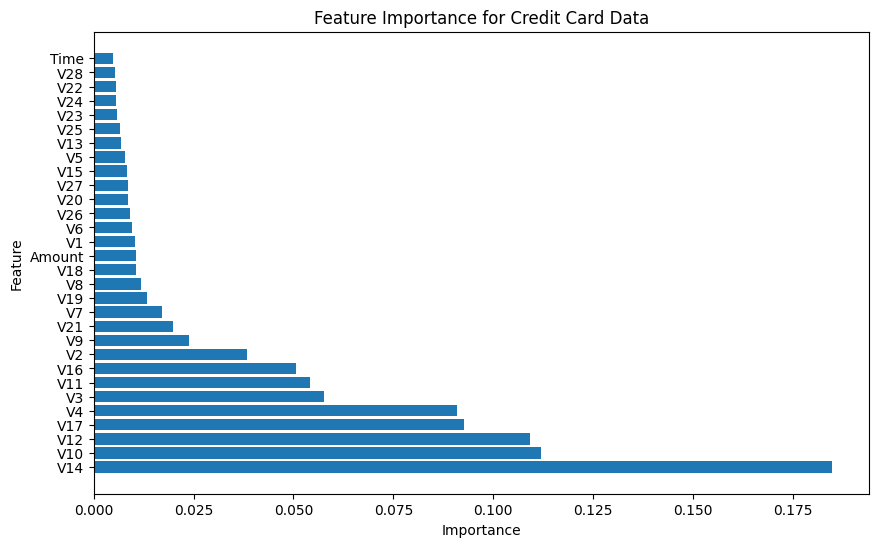

In [ ]:
importances = rf_credit.feature_importances_
feature_names = X_train_credit.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance for Credit Card Data')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Feature Importance for Fraud Data

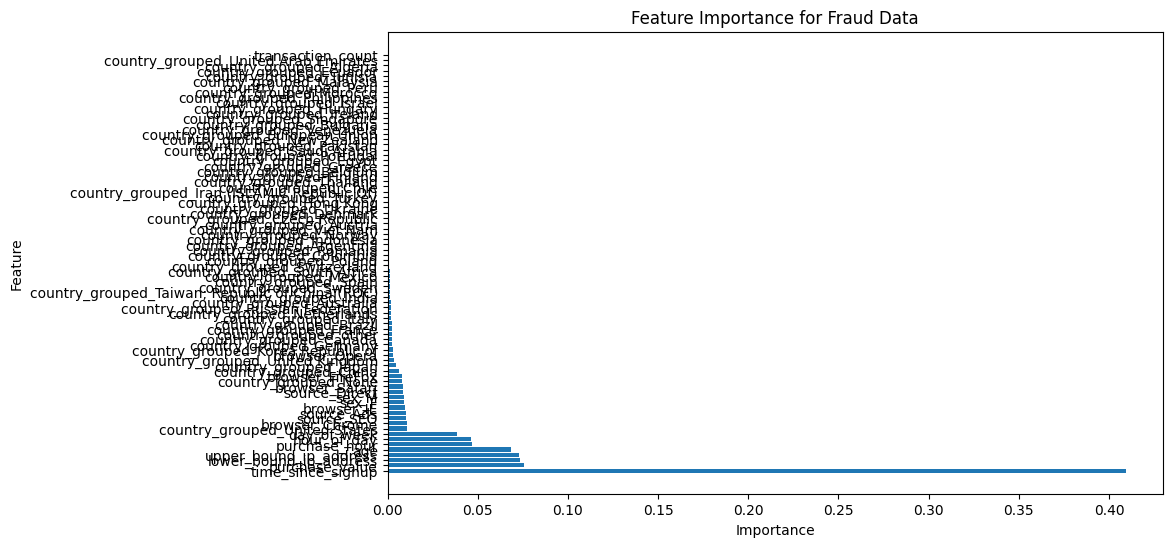

In [ ]:
importances = rf_fraud.feature_importances_
feature_names = X_train_fraud.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance for Fraud Data')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Train Gradient Boosting Model

## Train on Credit Card Dataset

In [ ]:
# Initialize Gradient Boosting model
gb_credit = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_credit.fit(X_train_credit, y_train_credit)

# Make predictions
y_pred_credit = gb_credit.predict(X_test_credit)

# Evaluate the model
print("Classification Report for Credit Card Data:")
print(classification_report(y_test_credit, y_pred_credit))
print(f"ROC-AUC Score: {roc_auc_score(y_test_credit, y_pred_credit):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_credit, y_pred_credit)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report for Credit Card Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.8008
Confusion Matrix:
[[56843    21]
 [   39    59]]


## Train on Fraud Data Dataset

In [ ]:
# Initialize Gradient Boosting model
gb_fraud = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_fraud.fit(X_train_fraud, y_train_fraud)

# Make predictions
y_pred_fraud = gb_fraud.predict(X_test_fraud)

# Evaluate the model
print("Classification Report for Fraud Data:")
print(classification_report(y_test_fraud, y_pred_fraud))
print(f"ROC-AUC Score: {roc_auc_score(y_test_fraud, y_pred_fraud):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_fraud, y_pred_fraud)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report for Fraud Data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27234
           1       1.00      0.54      0.70      2862

    accuracy                           0.96     30096
   macro avg       0.98      0.77      0.84     30096
weighted avg       0.96      0.96      0.95     30096

ROC-AUC Score: 0.7711
Confusion Matrix:
[[27232     2]
 [ 1310  1552]]


## Feature Importance for Credit Card Data

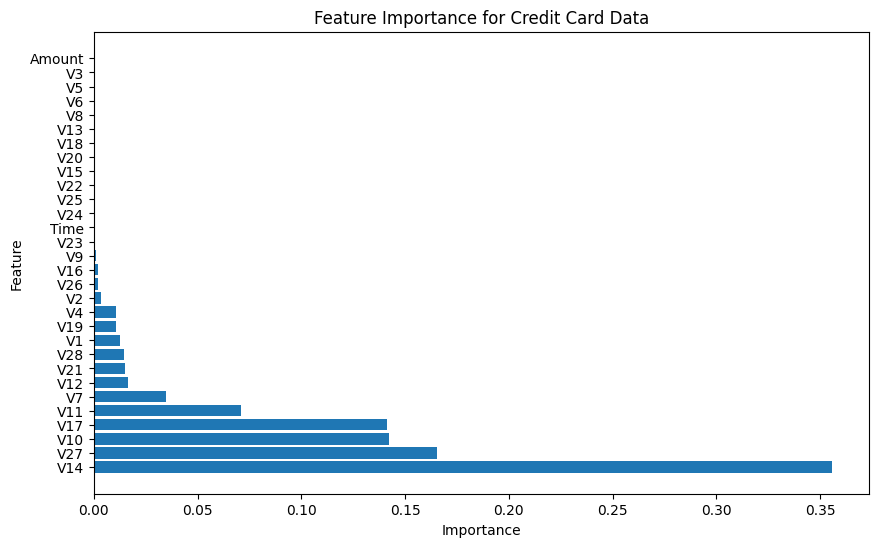

In [ ]:
importances = gb_credit.feature_importances_
feature_names = X_train_credit.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance for Credit Card Data')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Feature Importance for Fraud Data

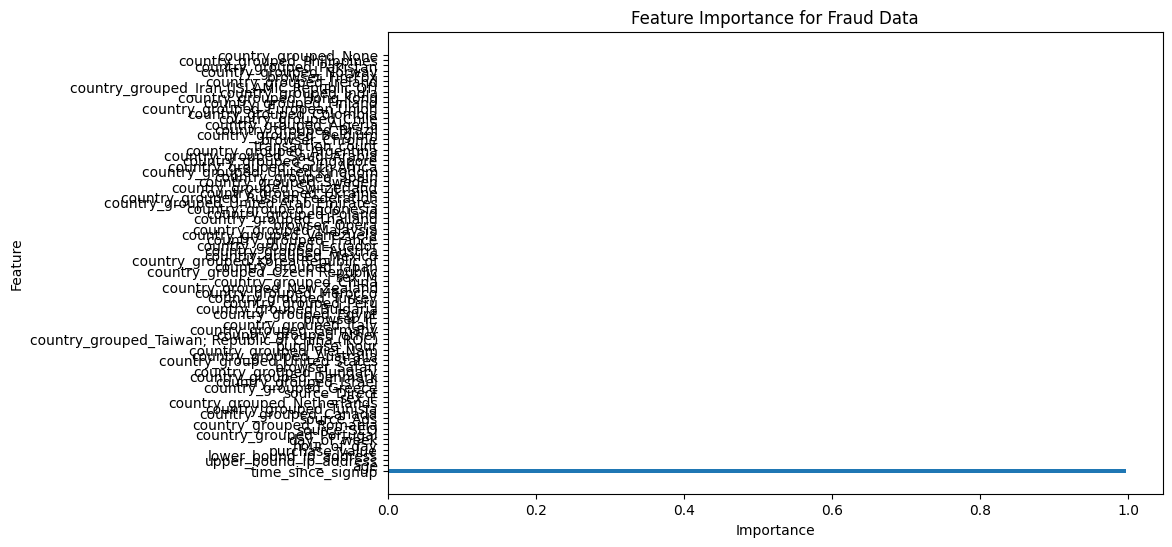

In [ ]:
importances = gb_fraud.feature_importances_
feature_names = X_train_fraud.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance for Fraud Data')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Training with Multi-Layer Perceptron (MLP)

In [ ]:
# Scale credit card data
scaler_credit = StandardScaler()
X_train_credit_scaled = scaler_credit.fit_transform(X_train_credit)
X_test_credit_scaled = scaler_credit.transform(X_test_credit)

# Scale fraud data
scaler_fraud = StandardScaler()
X_train_fraud_scaled = scaler_fraud.fit_transform(X_train_fraud)
X_test_fraud_scaled = scaler_fraud.transform(X_test_fraud)

##Train on Credit Card Dataset

In [ ]:
# Initialize MLP model
mlp_credit = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, early_stopping=True)

# Train the model
mlp_credit.fit(X_train_credit_scaled, y_train_credit)

# Make predictions
y_pred_credit = mlp_credit.predict(X_test_credit_scaled)

# Evaluate the model
print("Classification Report for Credit Card Data:")
print(classification_report(y_test_credit, y_pred_credit))
print(f"ROC-AUC Score: {roc_auc_score(y_test_credit, y_pred_credit):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_credit, y_pred_credit)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report for Credit Card Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.8877
Confusion Matrix:
[[56854    10]
 [   22    76]]


## Train on Fraud Data Dataset

In [ ]:
# Initialize MLP model
mlp_fraud = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, early_stopping=True)

# Train the model
mlp_fraud.fit(X_train_fraud_scaled, y_train_fraud)

# Make predictions
y_pred_fraud = mlp_fraud.predict(X_test_fraud_scaled)

# Evaluate the model
print("Classification Report for Fraud Data:")
print(classification_report(y_test_fraud, y_pred_fraud))
print(f"ROC-AUC Score: {roc_auc_score(y_test_fraud, y_pred_fraud):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_fraud, y_pred_fraud)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report for Fraud Data:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27234
           1       0.81      0.47      0.59      2862

    accuracy                           0.94     30096
   macro avg       0.88      0.73      0.78     30096
weighted avg       0.93      0.94      0.93     30096

ROC-AUC Score: 0.7268
Confusion Matrix:
[[26923   311]
 [ 1531  1331]]


## Permutation Importance

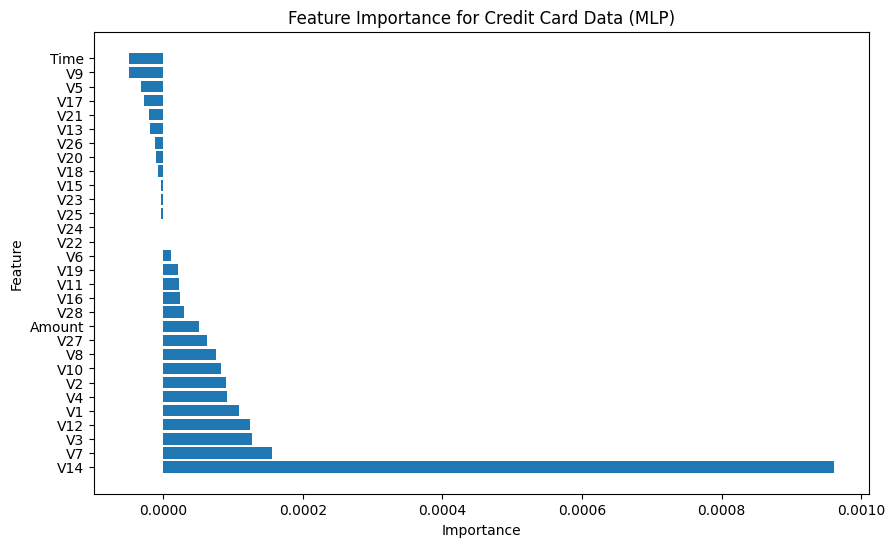

In [ ]:
# Calculate permutation importance
result = permutation_importance(mlp_credit, X_test_credit_scaled, y_test_credit, n_repeats=10, random_state=42)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X_train_credit.columns, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance for Credit Card Data (MLP)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Training with Convolutional Neural Network (CNN)

In [ ]:
## Reshape Data for CNN

In [ ]:
# Reshape data for CNN (samples, timesteps, features)
X_train_credit_cnn = X_train_credit.values.reshape((X_train_credit.shape[0], X_train_credit.shape[1], 1))
X_test_credit_cnn = X_test_credit.values.reshape((X_test_credit.shape[0], X_test_credit.shape[1], 1))

In [ ]:
# Reshape data for CNN (samples, timesteps, features)
X_train_fraud_cnn = X_train_fraud.values.reshape((X_train_fraud.shape[0], X_train_fraud.shape[1], 1))
X_test_fraud_cnn = X_test_fraud.values.reshape((X_test_fraud.shape[0], X_test_fraud.shape[1], 1))

## Build CNN Model

In [ ]:
def build_cnn_model(input_shape):
    model = Sequential()

    # First 1D Convolutional Layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    # Second 1D Convolutional Layer
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

## Train on Credit Card Dataset

In [ ]:
# Build model
input_shape = (X_train_credit_cnn.shape[1], 1)
cnn_credit = build_cnn_model(input_shape)

# Train the model
history_credit = cnn_credit.fit(X_train_credit_cnn, y_train_credit, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_credit = (cnn_credit.predict(X_test_credit_cnn) > 0.5).astype(int)
print("Classification Report for Credit Card Data:")
print(classification_report(y_test_credit, y_pred_credit))
print(f"ROC-AUC Score: {roc_auc_score(y_test_credit, y_pred_credit):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_credit, y_pred_credit)
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 75s 13ms/step - accuracy: 0.9972 - loss: 1.6595 - val_accuracy: 0.9982 - val_loss: 0.0070
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 58s 8ms/step - accuracy: 0.9985 - loss: 0.0468 - val_accuracy: 0.9983 - val_loss: 0.0663
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9989 - loss: 0.0170 - val_accuracy: 0.9981 - val_loss: 0.0078
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.9984 - loss: 0.0153 - val_accuracy: 0.9992 - val_loss: 0.0047
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.9985 - loss: 0.0117 - val_accuracy: 0.9992 - val_loss: 0.0061
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.9986 - loss: 0.0201 - val_accuracy: 0.9984 - val_loss: 0.0064
Epoch 7/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.9991 - val_loss: 0.0081
Epoch 8/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.9987 - loss: 

## Train on Fraud Data Dataset


In [ ]:
# Build model
input_shape = (X_train_fraud_cnn.shape[1], 1)
cnn_fraud = build_cnn_model(input_shape)

# Train the model
history_fraud = cnn_fraud.fit(X_train_fraud_cnn, y_train_fraud, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_fraud = (cnn_fraud.predict(X_test_fraud_cnn) > 0.5).astype(int)
print("Classification Report for Fraud Data:")
print(classification_report(y_test_fraud, y_pred_fraud))
print(f"ROC-AUC Score: {roc_auc_score(y_test_fraud, y_pred_fraud):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_fraud, y_pred_fraud)
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9144 - loss: 0.2649 - val_accuracy: 0.9229 - val_loss: 0.2220
Epoch 2/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - accuracy: 0.9382 - loss: 0.2209 - val_accuracy: 0.9488 - val_loss: 0.1971
Epoch 3/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 83s 15ms/step - accuracy: 0.9438 - loss: 0.2110 - val_accuracy: 0.9478 - val_loss: 0.1960
Epoch 4/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.9472 - loss: 0.2043 - val_accuracy: 0.9509 - val_loss: 0.1911
Epoch 5/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 83s 16ms/step - accuracy: 0.9482 - loss: 0.2031 - val_accuracy: 0.9522 - val_loss: 0.1934
Epoch 6/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 80s 15ms/step - accuracy: 0.9483 - loss: 0.2005 - val_accuracy: 0.9527 - val_loss: 0.1885
Epoch 7/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - accuracy: 0.9495 - loss: 0.1992 - val_accuracy: 0.9526 - val_loss: 0.1887
Epoch 8/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.9485 -

# Building and Training with Recurrent Neural Network (RNN)

In [ ]:
## Reshape Data for RNN

In [ ]:

# Reshape data for RNN (samples, timesteps, features)
X_train_credit_rnn = X_train_credit.values.reshape((X_train_credit.shape[0], 1, X_train_credit.shape[1]))
X_test_credit_rnn = X_test_credit.values.reshape((X_test_credit.shape[0], 1, X_test_credit.shape[1]))

In [ ]:
# Reshape data for RNN (samples, timesteps, features)
X_train_fraud_rnn = X_train_fraud.values.reshape((X_train_fraud.shape[0], 1, X_train_fraud.shape[1]))
X_test_fraud_rnn = X_test_fraud.values.reshape((X_test_fraud.shape[0], 1, X_test_fraud.shape[1]))

## Build RNN Model

In [ ]:
def build_rnn_model(input_shape):
    model = Sequential()

    # Simple RNN Layer
    model.add(SimpleRNN(64, input_shape=input_shape, activation='relu'))

    # Fully Connected Layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

## Train on Credit Card Dataset

In [ ]:
# Build model
input_shape = (X_train_credit_rnn.shape[1], X_train_credit_rnn.shape[2])
rnn_credit = build_rnn_model(input_shape)

# Train the model
history_credit = rnn_credit.fit(X_train_credit_rnn, y_train_credit, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_credit = (rnn_credit.predict(X_test_credit_rnn) > 0.5).astype(int)
print("Classification Report for Credit Card Data:")
print(classification_report(y_test_credit, y_pred_credit))
print(f"ROC-AUC Score: {roc_auc_score(y_test_credit, y_pred_credit):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_credit, y_pred_credit)
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9963 - loss: 21.8597 - val_accuracy: 0.9981 - val_loss: 0.8622
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9983 - loss: 0.0319 - val_accuracy: 0.9981 - val_loss: 0.0138
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9983 - loss: 0.1782 - val_accuracy: 0.9981 - val_loss: 0.0136
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9981 - loss: 0.0599 - val_accuracy: 0.9981 - val_loss: 0.0136
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9980 - loss: 0.1258 - val_accuracy: 0.9981 - val_loss: 0.0136
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9984 - loss: 0.0595 - val_accuracy: 0.9981 - val_loss: 0.0136
Epoch 7/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9983 - loss: 0.0347 - val_accuracy: 0.9981 - val_loss: 0.0136
Epoch 8/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9983 - loss: 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Train on Fraud Data Dataset

In [ ]:
# Build model
input_shape = (X_train_fraud_rnn.shape[1], X_train_fraud_rnn.shape[2])
rnn_fraud = build_rnn_model(input_shape)

# Train the model
history_fraud = rnn_fraud.fit(X_train_fraud_rnn, y_train_fraud, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_fraud = (rnn_fraud.predict(X_test_fraud_rnn) > 0.5).astype(int)
print("Classification Report for Fraud Data:")
print(classification_report(y_test_fraud, y_pred_fraud))
print(f"ROC-AUC Score: {roc_auc_score(y_test_fraud, y_pred_fraud):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_fraud, y_pred_fraud)
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8992 - loss: 0.3170 - val_accuracy: 0.9275 - val_loss: 0.2410
Epoch 2/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9202 - loss: 0.2449 - val_accuracy: 0.9370 - val_loss: 0.2222
Epoch 3/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9292 - loss: 0.2326 - val_accuracy: 0.9316 - val_loss: 0.2242
Epoch 4/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9312 - loss: 0.2260 - val_accuracy: 0.9445 - val_loss: 0.2103
Epoch 5/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9355 - loss: 0.2210 - val_accuracy: 0.9262 - val_loss: 0.2289
Epoch 6/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9370 - loss: 0.2167 - val_accuracy: 0.9397 - val_loss: 0.2102
Epoch 7/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9377 - loss: 0.2167 - val_accuracy: 0.9452 - val_loss: 0.2048
Epoch 8/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9379 - loss: 0.

#  Model Building and Training with Long Short-Term Memory (LSTM)

In [ ]:
# Reshape data for LSTM (samples, timesteps, features)
X_train_credit_lstm = X_train_credit.values.reshape((X_train_credit.shape[0], 1, X_train_credit.shape[1]))
X_test_credit_lstm = X_test_credit.values.reshape((X_test_credit.shape[0], 1, X_test_credit.shape[1]))

In [ ]:
# Reshape data for LSTM (samples, timesteps, features)
X_train_fraud_lstm = X_train_fraud.values.reshape((X_train_fraud.shape[0], 1, X_train_fraud.shape[1]))
X_test_fraud_lstm = X_test_fraud.values.reshape((X_test_fraud.shape[0], 1, X_test_fraud.shape[1]))

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()

    # LSTM Layer
    model.add(LSTM(64, input_shape=input_shape, activation='relu', return_sequences=False))

    # Fully Connected Layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Train on Credit Card Dataset

In [ ]:
# Build model
input_shape = (X_train_credit_lstm.shape[1], X_train_credit_lstm.shape[2])
lstm_credit = build_lstm_model(input_shape)

# Train the model
history_credit = lstm_credit.fit(X_train_credit_lstm, y_train_credit, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_credit = (lstm_credit.predict(X_test_credit_lstm) > 0.5).astype(int)
print("Classification Report for Credit Card Data:")
print(classification_report(y_test_credit, y_pred_credit))
print(f"ROC-AUC Score: {roc_auc_score(y_test_credit, y_pred_credit):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_credit, y_pred_credit)
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9912 - loss: 12.6330 - val_accuracy: 0.9981 - val_loss: 0.0233
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - accuracy: 0.9983 - loss: 0.0652 - val_accuracy: 0.9981 - val_loss: 0.0138
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9983 - loss: 0.0351 - val_accuracy: 0.9981 - val_loss: 0.0136
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9981 - loss: 0.2365 - val_accuracy: 0.9981 - val_loss: 0.0136
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9982 - loss: 0.0272 - val_accuracy: 0.9981 - val_loss: 0.0136
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9981 - loss: 0.0208 - val_accuracy: 0.9981 - val_loss: 0.0136
Epoch 7/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9984 - loss: 0.0900 - val_accuracy: 0.9981 - val_loss: 0.0136
Epoch 8/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9983 - loss: 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Train on Fraud Data Dataset

In [ ]:
# Build model
input_shape = (X_train_fraud_lstm.shape[1], X_train_fraud_lstm.shape[2])
lstm_fraud = build_lstm_model(input_shape)

# Train the model
history_fraud = lstm_fraud.fit(X_train_fraud_lstm, y_train_fraud, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_fraud = (lstm_fraud.predict(X_test_fraud_lstm) > 0.5).astype(int)
print("Classification Report for Fraud Data:")
print(classification_report(y_test_fraud, y_pred_fraud))
print(f"ROC-AUC Score: {roc_auc_score(y_test_fraud, y_pred_fraud):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_fraud, y_pred_fraud)
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9018 - loss: 0.3013 - val_accuracy: 0.9322 - val_loss: 0.2339
Epoch 2/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9246 - loss: 0.2379 - val_accuracy: 0.9426 - val_loss: 0.2173
Epoch 3/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9308 - loss: 0.2275 - val_accuracy: 0.9401 - val_loss: 0.2135
Epoch 4/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9340 - loss: 0.2234 - val_accuracy: 0.9299 - val_loss: 0.2193
Epoch 5/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9367 - loss: 0.2170 - val_accuracy: 0.9450 - val_loss: 0.2071
Epoch 6/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9393 - loss: 0.2140 - val_accuracy: 0.9444 - val_loss: 0.2058
Epoch 7/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9373 - loss: 0.2164 - val_accuracy: 0.9486 - val_loss: 0.2035
Epoch 8/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9404 - loss: 0